In [50]:
import numpy as np # linear algebra
import pandas as pd

In [51]:
data = pd.read_csv("Insurance_Marketing-Customer-Value-Analysis (1).csv")
from subprocess import check_output

(9134, 24)


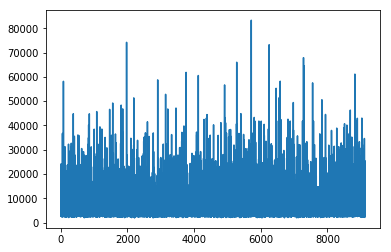

In [52]:
print(data.shape)
import matplotlib.pyplot as plt
import seaborn as sns
data['Customer Lifetime Value'].plot()

In [53]:
final_data=data.drop(['Customer','Effective To Date'],axis=1)
final_data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [54]:
final_data.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [55]:
from sklearn import preprocessing 

for f in final_data.columns: 
    if final_data[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(final_data[f].values)) 
        final_data[f] = lbl.transform(list(final_data[f].values))
        



In [56]:
final_data.dtypes

State                              int64
Customer Lifetime Value          float64
Response                           int64
Coverage                           int64
Education                          int64
EmploymentStatus                   int64
Gender                             int64
Income                             int64
Location Code                      int64
Marital Status                     int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int64
Policy                             int64
Renew Offer Type                   int64
Sales Channel                      int64
Total Claim Amount               float64
Vehicle Class                      int64
Vehicle Size                       int64
dtype: object

In [57]:
final_x=final_data


In [58]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.33, random_state=42)
X_train.head()


,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
290,3,9027.867218,0,2,0,1,0,99002,1,1,...,75,1,8,1,3,2,1,537.600000,0,1
2236,2,4722.237214,0,0,3,4,0,0,1,2,...,32,0,3,1,4,2,0,655.489027,0,1
6380,3,17788.057050,0,1,2,1,1,73339,0,0,...,13,0,2,1,5,1,0,17.558721,0,1
3396,0,5112.306584,0,1,1,1,1,44743,1,0,...,55,4,1,1,5,0,1,741.300032,3,2
2118,0,4759.624343,0,0,3,1,1,26747,1,1,...,44,0,3,0,1,2,3,404.074203,0,1


In [59]:
X_train.dtypes

State                              int64
Customer Lifetime Value          float64
Response                           int64
Coverage                           int64
Education                          int64
EmploymentStatus                   int64
Gender                             int64
Income                             int64
Location Code                      int64
Marital Status                     int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int64
Policy                             int64
Renew Offer Type                   int64
Sales Channel                      int64
Total Claim Amount               float64
Vehicle Class                      int64
Vehicle Size                       int64
dtype: object

In [94]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params=params = {"objective": "reg:linear",
          "eta": 1,
          "max_depth": 9,
          "min_child_weight": 4,
          "silent": 1,
          "subsample": 0.7,
          "colsample_bytree": 0.7,
          "seed": 1}
num_trees=250
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
y_pred=final_gb.predict(tesdmat)
print(y_pred)







##{'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
## gives 4181

[4183.0786 5480.919  3702.942  ... 5977.245  6790.449  3702.654 ]


D:\Program Files\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [95]:
from sklearn.metrics import mean_squared_error
import math
testScore=math.sqrt(mean_squared_error(y_test.values,y_pred))
print(testScore)

508.0533626319948
